In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import  fft, fftfreq

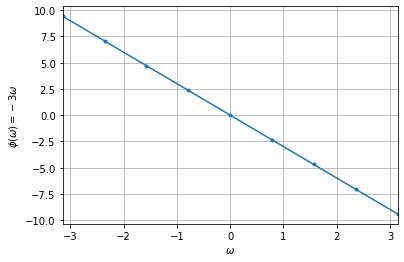

In [2]:
def linear_phase():
    omega = np.linspace(-np.pi, np.pi, 9)
    phi = -3 * omega
    plt.plot(omega, phi, marker=".")
    plt.xlim(-np.pi, np.pi); plt.xlabel("$\omega$"); plt.ylabel("$\phi(\omega) = -3 \omega$")
    plt.grid(True); plt.savefig("linear_phase.png", dpi=150);  plt.show()

linear_phase()

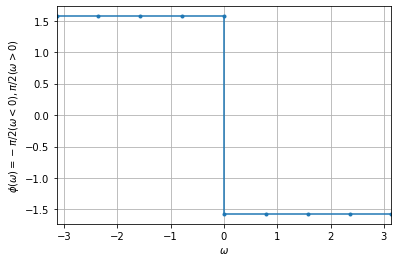

In [3]:
def hilbert_transform_phase():
    omega = np.hstack([np.linspace(-np.pi, 0, 5), np.linspace(0, np.pi, 5)])
    phi = np.hstack([(np.pi/2) * np.ones(5), -(np.pi/2) * np.ones(5)])
    plt.plot(omega, phi, marker=".")
    plt.xlim(-np.pi, np.pi); plt.xlabel("$\omega$"); plt.ylabel("$\phi(\omega) = -\pi/2 (\omega < 0), \pi/2 (\omega > 0)$")
    plt.grid(True); plt.savefig("hilbert_transform_phase.png", dpi=150);  plt.show()

hilbert_transform_phase()

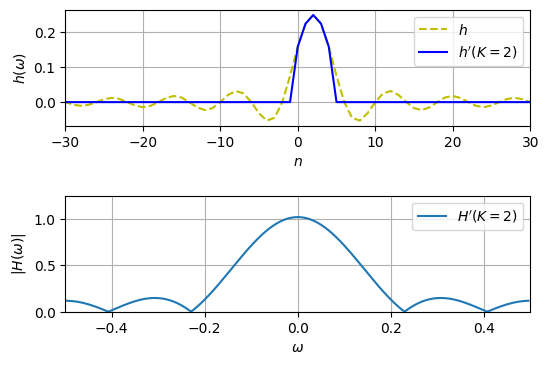

In [4]:
def lowpass_filter(K: int = 2):
    N = 256
    omega_c = np.pi/4
    n = np.arange(N) - (N//2)

    # impulse response function
    sinc = np.frompyfunc(lambda x: 1 if x == 0 else np.sin(x)/x, 1, 1)
    h = (omega_c/np.pi) * sinc(omega_c*(n-K))
    h_dash = h.copy(); h_dash[n < 0] = 0; h_dash[n > (2*K)] = 0

    f,axes = plt.subplots(2,1,dpi=100)
    axes[0].plot(n, h, "y",  label="$h$", linestyle="--")
    axes[0].plot(n, h_dash, color="b",  label=f"$h'(K={K})$")
    axes[0].set_xlabel("$n$"), axes[0].set_ylabel("$h(\omega)$")
    axes[0].set_xlim(-30,30); axes[0].grid(True);  axes[0].legend();

    # FFT
    H_dash = np.abs(fft(h_dash))
    omega = fftfreq(N, n[1]-n[0])
    index = np.argsort(omega)
    
    axes[1].plot(omega[index], H_dash[index],  label=f"$H'(K={K})$")
    axes[1].set_xlabel("$\omega$"), axes[1].set_ylabel("$|H(\omega)|$")
    axes[1].set_xlim(-0.5,0.5); axes[1].set_ylim(0,1.25); axes[1].grid(True);  axes[1].legend();

    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.savefig(f"lowpass_filter_k-{K}.png", dpi=150);  plt.show()

lowpass_filter()

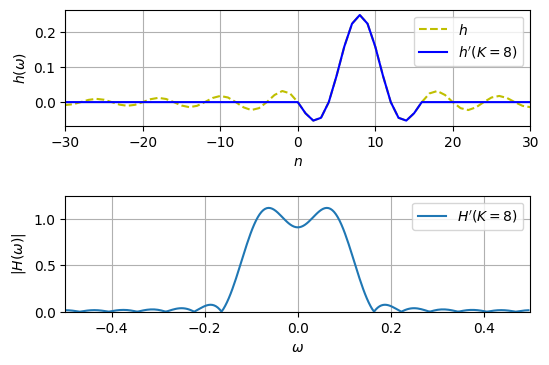

In [5]:
lowpass_filter(K=8)

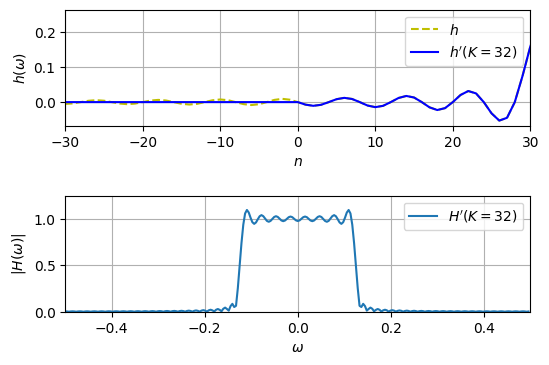

In [6]:
lowpass_filter(K=32)